## 3-coloring planar graphs without short cycles

#### Introduction

The _chromatic number_ $\chi = \chi(G)$ of a graph $G$ is the smallest number of colors that suffice to color the vertices of $G$ such that no two adjacent vertices have the same color.

4 Color Theorem: Let $G$ be a planar graph, then $\chi(G) \leq 4$.

It is NP-hard to decide if $\chi(G) \leq 3$ if _G_ is planar, but:

Let $G$ be a planar graph without cycles of lengths $4, \dots, 11$. Then $\chi(G) \leq 3$.


##### Discharging method idea (See ["Discharging method, by M. Salavatipour"](http://webdocs.cs.ualberta.ca/~mreza/talks/IPM-math06.pdf))

If this is not true and _G_ is a smallest (connected) counterexample, then there is:
1. no vertex of degree $\leq 2$ and
2. no cutvertex.

If we apply the following discharging method:
1. Assign a charge of $deg(v) - 6$ units to each vertex $v$ of $G$ and of $2 |f| - 6$ to each face $f$ of $G$.
2. Rule for discharging is: each non-triangle face sends 3/2 units to each of its vertices.

Then we come to a contradiction with the initial total charge of -12 and the final charge $\geq 0$.

#### Exercise

Write the following functions 
- `initial_charge(G)` which returns dicitionary with initial charges of vertices and faces
- `discharge(G, c0)` which returns dictionary with charges after discharging was applied to the initial charges `c0` (result of `initial_charge(G)`)
- `plot_charge(G, c)` which plots vertices with green color if they have non-negative charge and with red color if they are negatively charged (`c` is result of `plot_charge(G, c)`)
- `three_color(G)` which implements the following algorithm for three coloring of `G`

```
    if G has a cutvertex v:
        find blocks B1, B2, ..., Bk
        color each block recursively
        combine colorings of blocks into coloring c of the full graph (by permuting colors 
          in each block to make v colored with the same color in each block)
    else:
        find a vertex v of degree <= 2
        color G - v recursively
        extend coloring of G - v to v to obtain coloring c of G
    return c
```
**Note:** You can use Sage built-in function `blocks_and_cut_vertices` to find cutvertices and blocks. Also, see exercises notebook to find out how to check planarity, find faces, embedding...

In [30]:
def faces(G):
    """
    Return faces (as "tuples" of vertices) of a planar graph G. 
    """
    G.is_planar(set_embedding=True)
    F = G.faces()
    F = [tuple(x for (x, y) in f) for f in F]
    return F

def initial_charge(G):
    """
    Return a dictionary of charges for each vertex and face
    """
    F = faces(G)
    c = {}  # dictionary of charges
    #....
    #....
    return c

def discharge(G, c0):
    """
    Return a dictionary of charges for each vertex and face after discharging initial charges c0
    """
    c = c0.copy()
    F = faces(G)
    #....
    #....
    return c
    

def plot_colored_charges(G, c):
    """
    Plot negatively charged vertices of G with red and non-negatively charged vertices of G with green; 
    according to the charges given by the dictionary c
    """
    v_pos = [v for v in G.vertices() if c[v] >= 0]
    v_neg = [v for v in G.vertices() if c[v] < 0]
    return G.plot(vertex_colors={'green': v_pos, 'red': v_neg}, vertex_size=30, vertex_labels=False)
    

#### Examples

In [2]:
G = Graph('[hCGGC@?G?_@_@????G?@C?C??G??G??C??@???G???_@?@???@????_?G?G??E?')

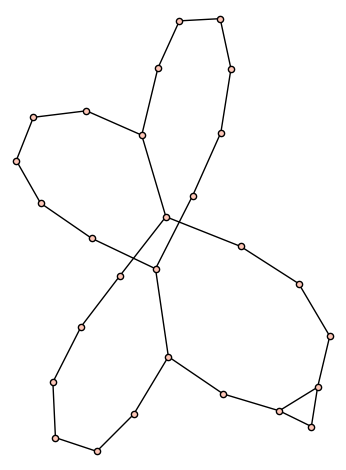

In [3]:
G.plot(vertex_size=20, vertex_labels=False)

**Note**: the graph is planar, it is just not drawn in a way that planarity is visible, try to use `G.is_planar(set_embedding=True, set_pos=True)`

In [18]:
c0 = initial_charge(G)

In [19]:
c0

{0: -4,
 1: -4,
 2: -4,
 3: -3,
 4: -4,
 5: -4,
 6: -4,
 7: -4,
 8: -4,
 9: -4,
 10: -3,
 11: -4,
 12: -4,
 13: -4,
 14: -4,
 15: -4,
 16: -3,
 17: -4,
 18: -3,
 19: -3,
 20: -4,
 21: -4,
 22: -4,
 23: -3,
 24: -4,
 25: -4,
 26: -4,
 27: -4,
 (10, 11, 12, 0, 1, 2, 3, 16, 15, 14, 13, 26, 25, 24, 23): 24,
 (22, 23, 24, 25, 26, 13, 14, 15, 16, 17, 18, 19, 20, 21): 22,
 (5, 6, 7, 8, 9, 10, 23, 22, 21, 20, 19, 27, 18, 17, 16, 3, 4): 28,
 (9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 12, 11, 10): 20,
 (19, 18, 27): 0}

In [22]:
c0 = initial_charge(G)
c = discharge(G, c0)

In [24]:
c

{0: -1,
 1: -1,
 2: -1,
 3: 3/2,
 4: -1,
 5: -1,
 6: -1,
 7: -1,
 8: -1,
 9: -1,
 10: 3/2,
 11: -1,
 12: -1,
 13: -1,
 14: -1,
 15: -1,
 16: 3/2,
 17: -1,
 18: 0,
 19: 0,
 20: -1,
 21: -1,
 22: -1,
 23: 3/2,
 24: -1,
 25: -1,
 26: -1,
 27: -5/2,
 (10, 11, 12, 0, 1, 2, 3, 16, 15, 14, 13, 26, 25, 24, 23): 3/2,
 (22, 23, 24, 25, 26, 13, 14, 15, 16, 17, 18, 19, 20, 21): 1,
 (5, 6, 7, 8, 9, 10, 23, 22, 21, 20, 19, 27, 18, 17, 16, 3, 4): 5/2,
 (9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 12, 11, 10): 1/2,
 (19, 18, 27): 0}

Sum of charges should be -12 before and after discharging

In [25]:
sum([c0[x] for x in G.vertices()]) + sum([c0[f] for f in faces(G)])

-12

In [26]:
sum([c[x] for x in G.vertices()]) + sum([c[f] for f in faces(G)])

-12

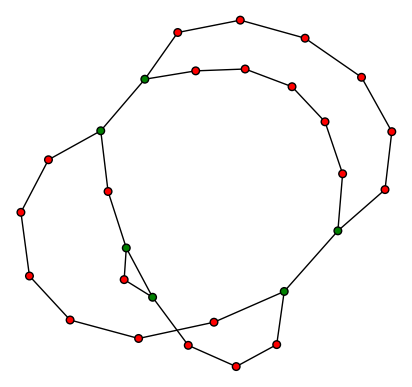

In [31]:
plot_colored_charges(G, c)

In [4]:
G.blocks_and_cut_vertices()

([[0,
   1,
   12,
   2,
   3,
   16,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   23,
   11,
   13,
   26,
   14,
   15,
   17,
   18,
   19,
   27,
   20,
   21,
   22,
   24,
   25]],
 [])

In [9]:
def three_color(G):
    '''
    Return 3 coloring of planar graph G without cycles of length 4, ..., 11.
    Coloring is represented as a dicitionary mapping a vertex to one of the colors 0, 1, 2. 
    '''
    if G.num_verts() == 1:
        return {G.vertices()[0]: 0}
    blocks, c_vertices = G.blocks_and_cut_vertices()
    if len(c_vertices) > 0:
        v = c_vertices[0]
        
        
        # recursively call for each block and "stitch" colorings together
        ....
    
    v = min(G.vertices(), key=lambda v: G.degree(v))
    if G.degree(v) <= 2:
        # call recursively on G - v
        
         
    # if we reach this point, our graph doeas not have right properties! 
    
    
    
        

In [11]:
Gcoloring = three_color(G)

In [12]:
def plot_colored(G, Gcoloring):
    res = {}
    cnames = ['red', 'green', 'blue']
    for v, c in Gcoloring.items():
        res.setdefault(cnames[c], []).append(v)
    return G.plot(vertex_colors=res)

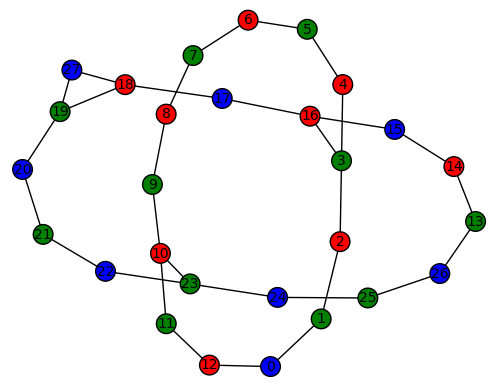

In [13]:
plot_colored(G, Gcoloring)

In [4]:
G2 = graphs.CycleGraph(3) + graphs.PathGraph(11)
G2.add_edges([(0, 3), (0, 13)])

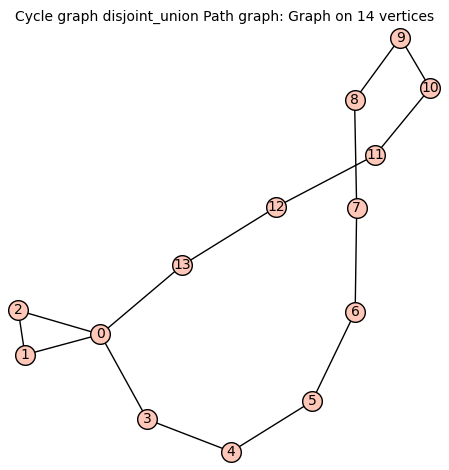

In [5]:
G2

In [6]:
blcks, cv = G2.blocks_and_cut_vertices()

In [7]:
blcks

[[0, 1, 2], [0, 3, 13, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

In [8]:
cv

[0]

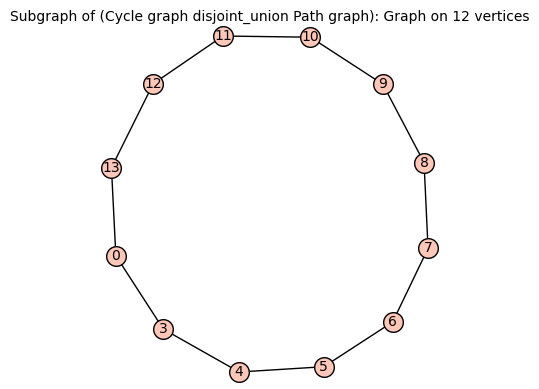

In [11]:
G2.subgraph(blcks[1])

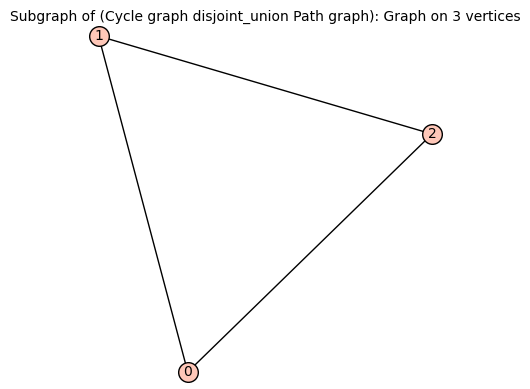

In [12]:
G2.subgraph(blcks[0])

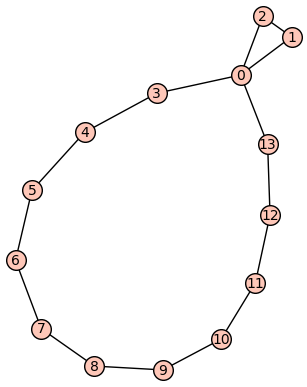

In [6]:
G2.plot()

In [17]:
c0 = initial_charge(G2)
c = discharge(G2, c0)

In [20]:
G2coloring = three_color(G2)

In [22]:
G2coloring

{13: 1,
 12: 0,
 11: 1,
 10: 0,
 9: 1,
 8: 0,
 7: 1,
 6: 0,
 5: 1,
 4: 0,
 3: 1,
 0: 0,
 2: 2,
 1: 1}

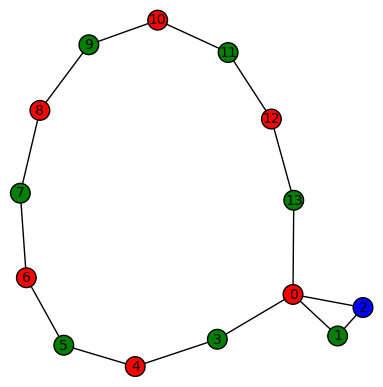

In [23]:
plot_colored(G2, G2coloring)